In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fedesoriano_stroke_prediction_dataset_path = kagglehub.dataset_download('fedesoriano/stroke-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(fedesoriano_stroke_prediction_dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1/healthcare-dataset-stroke-data.csv


In [ ]:
import numpy as np
import pandas as pd

# Load Data

In [ ]:
data_path = r"/root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1/healthcare-dataset-stroke-data.csv"

In [ ]:
# load the data

df = pd.read_csv(data_path)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# missing values

df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
# duplicate rows in data
df.duplicated().sum()

0

# Column Wise Cleaning

## Gender

In [ ]:
# categories in gender column

df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
# index where gender is "other"

print(df[df['gender'] == 'Other'].index.values)

[3116]


## Age

In [ ]:
# find rows where age value is not an integer

(
    (df['age'] - df['age'].astype("int"))
    .loc[lambda x: x > 0]
)

,age
162,0.32
363,0.64
376,0.88
562,0.80
564,0.32
...,...
4934,0.32
5032,0.24
5079,0.72
5089,0.72


**There are 115 rows where the age value is a float**

In [ ]:
# index values where age is not an integer

index_age_float = (
    (df['age'] - df['age'].astype("int"))
    .loc[lambda x: x > 0]
    .index.values
)

index_age_float

array([ 162,  363,  376,  562,  564,  597,  607,  684,  753,  850,  913,
        982,  995,  996, 1093, 1101, 1134, 1137, 1206, 1218, 1244, 1317,
       1366, 1486, 1499, 1600, 1609, 1614, 1632, 1758, 1808, 1927, 1948,
       1957, 1975, 1999, 2008, 2012, 2030, 2074, 2116, 2194, 2305, 2311,
       2329, 2358, 2397, 2472, 2481, 2490, 2579, 2630, 2692, 2708, 2801,
       2808, 2875, 2898, 2928, 3092, 3097, 3251, 3295, 3313, 3319, 3321,
       3392, 3435, 3440, 3447, 3560, 3584, 3605, 3610, 3618, 3626, 3647,
       3705, 3714, 3715, 3726, 3786, 3807, 3859, 3868, 3883, 3888, 3894,
       3928, 3968, 4001, 4006, 4007, 4021, 4053, 4293, 4303, 4364, 4409,
       4546, 4581, 4640, 4645, 4694, 4831, 4839, 4842, 4860, 4910, 4929,
       4934, 5032, 5079, 5089, 5095])

In [ ]:
# find the min and max values

df.loc[index_age_float,"age"].agg(["min","max"])

,age
min,0.08
max,1.88


In [ ]:
# round of the ages to the nearest number

def convert_age_to_integer(ser):
    return np.select(
        condlist = [ser < 1, (ser >= 1) & (ser <= 1.5), (ser > 1.5) & (ser < 2)],
        choicelist = [1, np.floor(ser), np.ceil(ser)],
        default = ser
    )

pd.concat([df.loc[index_age_float,"age"],df.loc[index_age_float,"age"].apply(convert_age_to_integer)],axis=1)

,age,age
162,1.32,1.0
363,0.64,1.0
376,0.88,1.0
562,1.80,2.0
564,0.32,1.0
...,...,...
4934,1.32,1.0
5032,1.24,1.0
5079,1.72,2.0
5089,0.72,1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

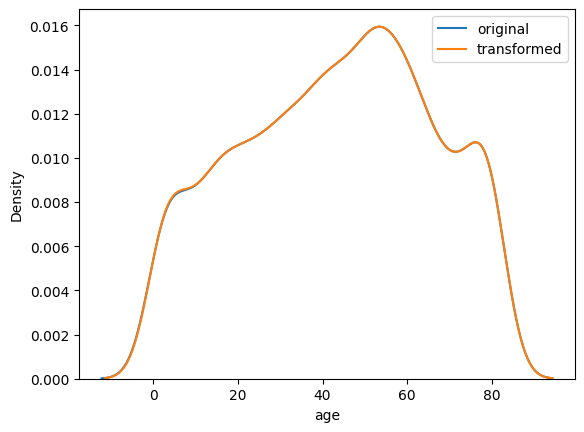

In [ ]:
# distribution plots

sns.kdeplot(df,x='age',label='original')
sns.kdeplot(df['age'].apply(convert_age_to_integer),label='transformed')
plt.legend()

## Hypertension

In [ ]:
# unique values

df['hypertension'].unique()

array([0, 1])

## Heart disease

In [ ]:
# unique values

df['heart_disease'].unique()

array([1, 0])

## Ever Married

In [ ]:
# unique values in column

df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

## Work_Type

In [ ]:
# unique values in work type column
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
# work type column title case
df['work_type'].str.title().unique()

array(['Private', 'Self-Employed', 'Govt_Job', 'Children', 'Never_Worked'],
      dtype=object)

In [ ]:
# fix work type for children

def fix_work_type(df):
    return (
        np.select(condlist=[
                            (df['age'] < 18) & (df['work_type'] == "Children"),
                            (df['age'] < 18) & (df['work_type'] == "Never_Worked"),
                            (df['age'] < 18) & (~df['work_type'].isin(["Children","Never_Worked"]))],
                  choicelist=['Children',"Never_Worked","Children"],
                  default=df['work_type'])
    )

## Residence Type

In [ ]:
# unique values in residence type column

df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

## Smoking Status

In [ ]:
# unique values in smoking status column
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
(
    df['smoking_status']
    .str.title()
    .str.replace(" ","_")
    .unique()
)

array(['Formerly_Smoked', 'Never_Smoked', 'Smokes', 'Unknown'],
      dtype=object)

In [ ]:
def clean_smoking_column(ser):
    return (
        ser
        .str.title()
        .str.replace(" ","_")
    )

## Avg Glucose Level

In [ ]:
# min and maximum value of column

df['avg_glucose_level'].agg(["min","max"])

,avg_glucose_level
min,55.12
max,271.74


## BMI

In [ ]:
# min and maximum value of column

df['bmi'].agg(["min","max"])

,bmi
min,10.3
max,97.6


# Clean Data

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df['work_type'].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [ ]:
# work type in minors

df.loc[df['age'] < 18,'work_type'].value_counts()

,count
work_type,
children,687
Private,134
Never_worked,17
Self-employed,12
Govt_job,6


In [ ]:
# work type in minors

df.loc[df['age'] < 18,'work_type'].value_counts().sum()

856

In [ ]:

def clean_data(data: pd.DataFrame) -> pd.DataFrame:
    return (
        data
        .rename(columns=str.lower)
        .drop(columns=['id'])
        .drop(index=df[df['gender'] == 'Other'].index.values)
        .assign(age = lambda x: x['age'].pipe(convert_age_to_integer).astype("int"))
        .assign(
            **{
                col: lambda x: x[col].astype("bool")
                for col in ["heart_disease","hypertension"]
            })
        .assign(
            ever_married = lambda x: x['ever_married'].replace({"Yes": True,
                                                                "No": False})
        )
        .assign(work_type = lambda x: x['work_type'].str.title())
        .assign(work_type = lambda x: x.pipe(fix_work_type))
        .assign(smoking_status = lambda x: x['smoking_status'].pipe(clean_smoking_column))

    )

In [ ]:
clean_data(df).sample(30,random_state=42)

<ipython-input-32-cdc0b8b3ff94>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ever_married = lambda x: x['ever_married'].replace({"Yes": True,


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4688,Male,31,False,False,False,Self-Employed,Rural,64.85,23.0,Unknown,0
4478,Male,40,False,False,True,Self-Employed,Rural,65.29,28.3,Never_Smoked,0
3521,Male,52,False,False,True,Private,Rural,111.04,30.0,Never_Smoked,0
4355,Female,79,True,True,True,Self-Employed,Rural,76.64,19.5,Never_Smoked,0
3826,Female,75,False,False,True,Govt_Job,Rural,94.77,27.2,Never_Smoked,0
3951,Female,79,True,True,True,Self-Employed,Rural,92.43,NaN,Never_Smoked,0
3752,Female,57,True,True,True,Private,Urban,108.61,38.1,Smokes,0
465,Male,69,False,False,True,Private,Rural,101.52,26.8,Smokes,0
410,Male,7,False,False,False,Children,Rural,64.06,18.9,Unknown,0
1632,Female,1,False,False,False,Children,Rural,55.51,18.5,Unknown,0


In [ ]:
# save the cleaned data

cleaned_data = clean_data(df)

cleaned_data.to_csv("cleaned_stroke_prediction_data.csv",index=False)

<ipython-input-32-cdc0b8b3ff94>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ever_married = lambda x: x['ever_married'].replace({"Yes": True,


In [ ]:
cleaned_data.loc[cleaned_data['age'] < 18,'work_type'].value_counts()

,count
work_type,
Children,839
Never_Worked,17


In [ ]:
cleaned_data.loc[cleaned_data['age'] < 18,'work_type'].value_counts().sum()

856

In [ ]:
df['work_type'].value_counts().drop(index='children') - df.loc[df['age'] < 18,'work_type'].value_counts().drop(index='children')

,count
work_type,
Govt_job,651
Never_worked,5
Private,2791
Self-employed,807


In [ ]:
cleaned_data['work_type'].value_counts()

,count
work_type,
Private,2790
Children,839
Self-Employed,807
Govt_Job,651
Never_Worked,22
